# Company Bankruptcy Prediction

#### By: Erik Konstenius

Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009. Company bankruptcy is defined based on the business regulations of the Taiwan Stock Exchange. 


Y = Bankrupt? ("1" = Bankrupt, "0" = Not Bankrupt)


Algorithms used:
- XGBClassifier 
- CatBoostClassifier 
- Random Forests 
- SVM 
- KNN 
- Decision Trees 
- Naive Bayes

In [1]:
# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_curve, roc_auc_score,confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE

# classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
df = pd.read_csv(r'C:\Users\Erik Konstenius\Downloads\archive\data.csv')

# EDA

The dependent variable appears to be a variable that takes the values 0 or 1

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.shape

(6819, 96)

To find the relative distribution of the values I use ".describe()"

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


The output shows that the there are 8819 companies included in the sample

Finding nulls and data types using ".info()"

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

The output shows that there are no null values and that all datatypes are either integers or floats

# Dealing with outliers

In [7]:
def outliers_removal(features,feature_name,dataset):
    q25 = np.percentile(features, 25)
    q75 = np.percentile(features, 75)
    feat_lower_bound = q25 - (q75 - q25)*1.5
    feat_upper_bound = q75 + (q75 - q25)*1.5
    data = dataset.drop(df[(df[feature_name] > feat_upper_bound) | (df[feature_name] < feat_lower_bound)].index)
    return data

for col in df:
    new_df = outliers_removal(df[col],str(col),df)

In [8]:
new_df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,...,6270.000000,6.270000e+03,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.0,6270.000000
mean,0.034769,0.505080,0.558403,0.553447,0.607232,0.607211,0.998754,0.797187,0.809079,0.303621,...,0.807503,1.594482e+07,0.623764,0.607230,0.840366,0.280795,0.027606,0.565373,1.0,0.037347
std,0.183208,0.059819,0.064196,0.060618,0.013592,0.013571,0.013558,0.013402,0.014170,0.011635,...,0.039779,3.395291e+08,0.010699,0.013592,0.015128,0.015007,0.016338,0.013779,0.0,0.018390
min,0.000000,0.000000,0.000000,0.000000,0.432653,0.432653,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.432654,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476966,0.536143,0.527772,0.600225,0.600212,0.998971,0.797387,0.809312,0.303465,...,0.796907,9.559032e-04,0.623622,0.600224,0.840129,0.277347,0.026791,0.565158,1.0,0.023761
50%,0.000000,0.502754,0.559693,0.552278,0.605525,0.605511,0.999021,0.797460,0.809373,0.303523,...,0.810372,2.171467e-03,0.623855,0.605523,0.841210,0.279112,0.026815,0.565283,1.0,0.032041
75%,0.000000,0.534637,0.588121,0.582941,0.612858,0.612792,0.999088,0.797568,0.809460,0.303580,...,0.825821,5.533255e-03,0.624119,0.612856,0.842381,0.281803,0.026928,0.565795,1.0,0.046423
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999778,1.000000,1.000000,1.000000,...,0.981315,9.820000e+09,0.956387,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.095322


# Preprocessing - train/test split

Shuffle dataframe rows

In [9]:
new_df = new_df.sample(frac=1, random_state=42)

Group data on features and labels

In [10]:
features = new_df.drop(['Bankrupt?'], axis = 1)
labels = pd.DataFrame(new_df['Bankrupt?'])

feature_array = features.values
label_array = labels.values

Splitting the data in a train set (80 %) and test set (20 %)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20, random_state=42)

Normalize data since some are calculated as a proportion and some are calculated as integer values

In [12]:
X_train = pd.DataFrame(X_train,columns = features.columns)
X_test = pd.DataFrame(X_test,columns = features.columns)

In [13]:
X_train.shape

(5016, 95)

In [14]:
X_test.shape

(1254, 95)

# Dealing with class inbalances through SMOTE

<AxesSubplot:>

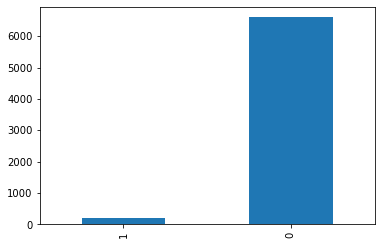

In [15]:
df['Bankrupt?'].value_counts().sort_values().plot(kind = 'bar')

The below code upscales the number of bankrupt observations to equal the number of non-bankrupt observations

<AxesSubplot:>

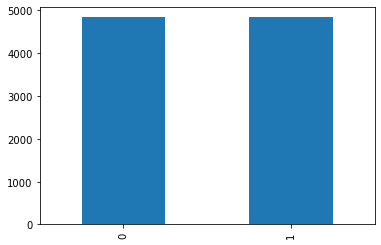

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)
temp = pd.DataFrame(y_train,columns =['Bankrupt?'])
temp['Bankrupt?'].value_counts().sort_values().plot(kind = 'bar')

# Modeling

In [17]:
# The initial modeling phase includes some hyperparameter tuning. This is done to make sure we do
# not miss relevant models. Yet, more in-depth tuning will be done later on selected models.

log_reg_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
dec_tree_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
rand_for_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
kneighbors_params = [{"n_neighbors":3}, {"n_neighbors":5}]
naive_bayes_params = [{}]
svc_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
xgb_params = [{"silent":True}]
cb_params = [{"nan_mode":"Min"}]

classifier_list = [
    ["Logistic Regression", LogisticRegression, log_reg_params],
    ["Decision Trees", DecisionTreeClassifier, dec_tree_params],
    ["Random Forests", RandomForestClassifier, rand_for_params],
    ["KNN", KNeighborsClassifier, kneighbors_params],
    ["Naive Bayes", GaussianNB, naive_bayes_params],
    ["SVM", SVC, svc_params],
    ["XGB", XGBClassifier, xgb_params],
    ["CatBoost", CatBoostClassifier, cb_params]
]

In [18]:
insights = []

for classifier, Model, params_list in classifier_list:
    for parameter in params_list:
        model = Model()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, zero_division = 0)
        recall = recall_score(y_test, y_pred)
        #fpr, tpr, _ = roc_curve(y_test,  y_pred)
        #auc = roc_auc_score(y_test, y_pred)
        insights.append((classifier, parameter, accuracy, precision, recall));

C:\Users\Erik Konstenius\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Erik Konstenius\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

[18:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.027146
0:	learn: 0.6584714	total: 157ms	remaining: 2m 36s
1:	learn: 0.6272949	total: 162ms	remaining: 1m 21s
2:	learn: 0.5953645	total: 169ms	remaining: 56.3s
3:	learn: 0.5705162	total: 176ms	remaining: 43.8s
4:	learn: 0.5447604	total: 183ms	remaining: 36.4s
5:	learn: 0.5218480	total: 190ms	remaining: 31.4s
6:	learn: 0.5015375	total: 196ms	remaining: 27.8s
7:	learn: 0.4813771	total: 203ms	remaining: 25.1s
8:	learn: 0.4632082	total: 209ms	remaining: 23s
9:	learn: 0.4452312	total: 215ms	remaining: 21.3s
10:	learn: 0.4300071	total: 221ms	remaining: 19.9s
11:	learn: 0.4136037	total: 228ms	remaining: 18.7s
12:	learn: 0.3998667	total: 234ms	remaining: 17.7s
13:	lea

In [19]:
output = pd.DataFrame(insights, columns=['Classifier', 'Parameter', 'Accuracy', 'Precision', 'Recall']).sort_values(by='Precision', ascending=False)
output

,Classifier,Parameter,Accuracy,Precision,Recall
15,XGB,{'silent': True},0.959330,0.347826,0.432432
16,CatBoost,{'nan_mode': 'Min'},0.935226,0.340426,0.432432
7,Random Forests,{'criterion': 'entropy'},0.949761,0.275862,0.432432
6,Random Forests,{'criterion': 'gini'},0.948166,0.274194,0.459459
5,Decision Trees,{'criterion': 'entropy'},0.934609,0.252747,0.621622
4,Decision Trees,{'criterion': 'gini'},0.923445,0.195876,0.513514
11,SVM,{'C': 0.01},0.776715,0.067616,0.513514
14,SVM,{'C': 10},0.776715,0.067616,0.513514
13,SVM,{'C': 1},0.776715,0.067616,0.513514
12,SVM,{'C': 0.1},0.776715,0.067616,0.513514


The model selection should not be done solely by the accuracy score given the evident class imbalance in the original dataset. Instead, one could look at the precision or recall scores. Precision answers the question "out of all companies labelled as "bankrupt" how many were actually bankrupt?". Recall answers the question "out of all companies that were actually bankrupt, how many did the algorithm classify as bankrupt?". I would argue that the precision score would be the most relevant for, say, investors that would like invest in bonds that a company is issuing. The XGBClassifier and CatBoostClassifier appear to produce the highest precision scores.

# Final hyperparameter tuning

In this section, the XGBClassfier and CatBoostClassfier will undergo further hyperparameter tuning

### CatBoostClassfier

In [20]:
CBC = CatBoostClassifier()

param_grid = {'l2_leaf_reg':[0.5,3,1,5],'learning_rate' : [0.01, 0.05, 0.1], 'depth' : [2,6,8], 'iterations' : [10,30, 50, 100]}
scorers = {'precision_score': make_scorer(precision_score)}

In [21]:
def grid_searcher(refit_score='precision_score'):
    skf = StratifiedKFold(n_splits=3)
    grid_search = GridSearchCV(CBC, param_grid, scoring=scorers, refit=refit_score, cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    return grid_search

In [22]:
grid_search_clf = grid_searcher(refit_score='precision_score')

0:	learn: 0.5665135	total: 31.3ms	remaining: 3.09s
1:	learn: 0.4737481	total: 52.3ms	remaining: 2.56s
2:	learn: 0.3890047	total: 73.4ms	remaining: 2.37s
3:	learn: 0.3325996	total: 94.7ms	remaining: 2.27s
4:	learn: 0.2994356	total: 116ms	remaining: 2.2s
5:	learn: 0.2745536	total: 136ms	remaining: 2.13s
6:	learn: 0.2484439	total: 156ms	remaining: 2.07s
7:	learn: 0.2284667	total: 175ms	remaining: 2.01s
8:	learn: 0.2104657	total: 196ms	remaining: 1.99s
9:	learn: 0.1979520	total: 217ms	remaining: 1.95s
10:	learn: 0.1862094	total: 238ms	remaining: 1.93s
11:	learn: 0.1742711	total: 259ms	remaining: 1.9s
12:	learn: 0.1637593	total: 279ms	remaining: 1.87s
13:	learn: 0.1552194	total: 299ms	remaining: 1.84s
14:	learn: 0.1492488	total: 320ms	remaining: 1.81s
15:	learn: 0.1435180	total: 341ms	remaining: 1.79s
16:	learn: 0.1364856	total: 361ms	remaining: 1.76s
17:	learn: 0.1311046	total: 382ms	remaining: 1.74s
18:	learn: 0.1248430	total: 404ms	remaining: 1.72s
19:	learn: 0.1199549	total: 426ms	remai

Finding the best parameters

In [23]:
print(grid_search_clf.best_params_)

{'depth': 8, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


Create fit model on best parameters

In [24]:
from sklearn.metrics import classification_report
CBC_final = CatBoostClassifier(depth = 8, iterations = 100, l2_leaf_reg = 1, learning_rate = 0.1)
CBC_final.fit(X_train,y_train)
y_pred = CBC_final.predict(X_test)

0:	learn: 0.5665135	total: 30.8ms	remaining: 3.05s
1:	learn: 0.4737481	total: 49.8ms	remaining: 2.44s
2:	learn: 0.3890047	total: 69.3ms	remaining: 2.24s
3:	learn: 0.3325996	total: 88.7ms	remaining: 2.13s
4:	learn: 0.2994356	total: 108ms	remaining: 2.05s
5:	learn: 0.2745536	total: 128ms	remaining: 2s
6:	learn: 0.2484439	total: 147ms	remaining: 1.96s
7:	learn: 0.2284667	total: 167ms	remaining: 1.92s
8:	learn: 0.2104657	total: 187ms	remaining: 1.89s
9:	learn: 0.1979520	total: 206ms	remaining: 1.86s
10:	learn: 0.1862094	total: 226ms	remaining: 1.82s
11:	learn: 0.1742711	total: 246ms	remaining: 1.8s
12:	learn: 0.1637593	total: 266ms	remaining: 1.78s
13:	learn: 0.1552194	total: 288ms	remaining: 1.77s
14:	learn: 0.1492488	total: 311ms	remaining: 1.76s
15:	learn: 0.1435180	total: 333ms	remaining: 1.75s
16:	learn: 0.1364856	total: 355ms	remaining: 1.73s
17:	learn: 0.1311046	total: 375ms	remaining: 1.71s
18:	learn: 0.1248430	total: 395ms	remaining: 1.68s
19:	learn: 0.1199549	total: 414ms	remaini

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1217
           1       0.36      0.54      0.43        37

    accuracy                           0.96      1254
   macro avg       0.67      0.76      0.70      1254
weighted avg       0.97      0.96      0.96      1254



In [26]:
print(precision_score(y_test, y_pred))

0.35714285714285715


The precision has increased slightly to about 36 %

### XGBClassifier

In [27]:
XGB = XGBClassifier()

param_grid = {'max_depth':[3,6,10],'learning_rate' : [0.05, 0.15, 0.3], 'min_child_weight' : [1,5], 'gamma' : [0,0.2,0.4], 'colsample_bytree' : [0.3, 0.4, 0.5]}
scorers = {'precision_score': make_scorer(precision_score)}

In [28]:
def grid_searcher(refit_score='precision_score'):
    skf = StratifiedKFold(n_splits=3)
    grid_search = GridSearchCV(XGB, param_grid, scoring=scorers, refit=refit_score, cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

    return grid_search

In [29]:
grid_search_clf = grid_searcher(refit_score='precision_score')

C:\Users\Erik Konstenius\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
print(grid_search_clf.best_params_)

{'colsample_bytree': 0.3, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1}


In [31]:
from sklearn.metrics import classification_report
XGB_final = XGBClassifier(colsample_bytree = 0.5, gamma = 0, learning_rate = 0.3, max_depth=6, min_child_weight = 1 )
XGB_final.fit(X_train,y_train)
y_pred = XGB_final.predict(X_test)

[18:14:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1217
           1       0.40      0.49      0.44        37

    accuracy                           0.96      1254
   macro avg       0.69      0.73      0.71      1254
weighted avg       0.97      0.96      0.97      1254



In [33]:
print(precision_score(y_test, y_pred))

0.4


# Conclusion

The results show that boosting algorithms such as CatBoost and XGBoost outperform other methods used in this project. The main idea of boosting is to sequentially combine many weak models (a model performing slightly better than random chance) and thus through greedy search create a strong competitive predictive model. Because gradient boosting fits the decision trees sequentially, the fitted trees will learn from the mistakes of former trees and hence reduce the errors. Although the prediction scores are very similar, XGBoost does achieve the highest precision of about 40 %. This score is among the highest on Kaggle. 